In [1]:
import sys
from pathlib import Path

repo_root_dir: Path = Path(r"C:\Users\chris\Desktop\GitHub\pytorch-regression\notebooks\train.ipynb").parent.parent

if str(repo_root_dir) not in sys.path:
    sys.path.append(str(repo_root_dir))

for p in sys.path: print(p)

C:\Users\chris\AppData\Local\Programs\Python\Python313\python313.zip
C:\Users\chris\AppData\Local\Programs\Python\Python313\DLLs
C:\Users\chris\AppData\Local\Programs\Python\Python313\Lib
C:\Users\chris\AppData\Local\Programs\Python\Python313
c:\Users\chris\Desktop\GitHub\pytorch-regression\.venv

c:\Users\chris\Desktop\GitHub\pytorch-regression\.venv\Lib\site-packages
c:\Users\chris\Desktop\GitHub\pytorch-regression\.venv\Lib\site-packages\win32
c:\Users\chris\Desktop\GitHub\pytorch-regression\.venv\Lib\site-packages\win32\lib
c:\Users\chris\Desktop\GitHub\pytorch-regression\.venv\Lib\site-packages\Pythonwin
C:\Users\chris\Desktop\GitHub\pytorch-regression


In [2]:
import torch
import matplotlib.pyplot as plt

In [3]:
from src.common import tools

config = tools.load_config()

data_path: Path = repo_root_dir / config["data_path"]

In [4]:
from src import models
from pathlib import Path

data_paths = list(Path(data_path).rglob("*.csv" ))

model = models.LinearRegressionModel()

In [5]:
from src import preprocess

dataset = preprocess.CSVDataset(data_paths)
len(dataset)

999

$f(x) = 0.841x + 0.708$


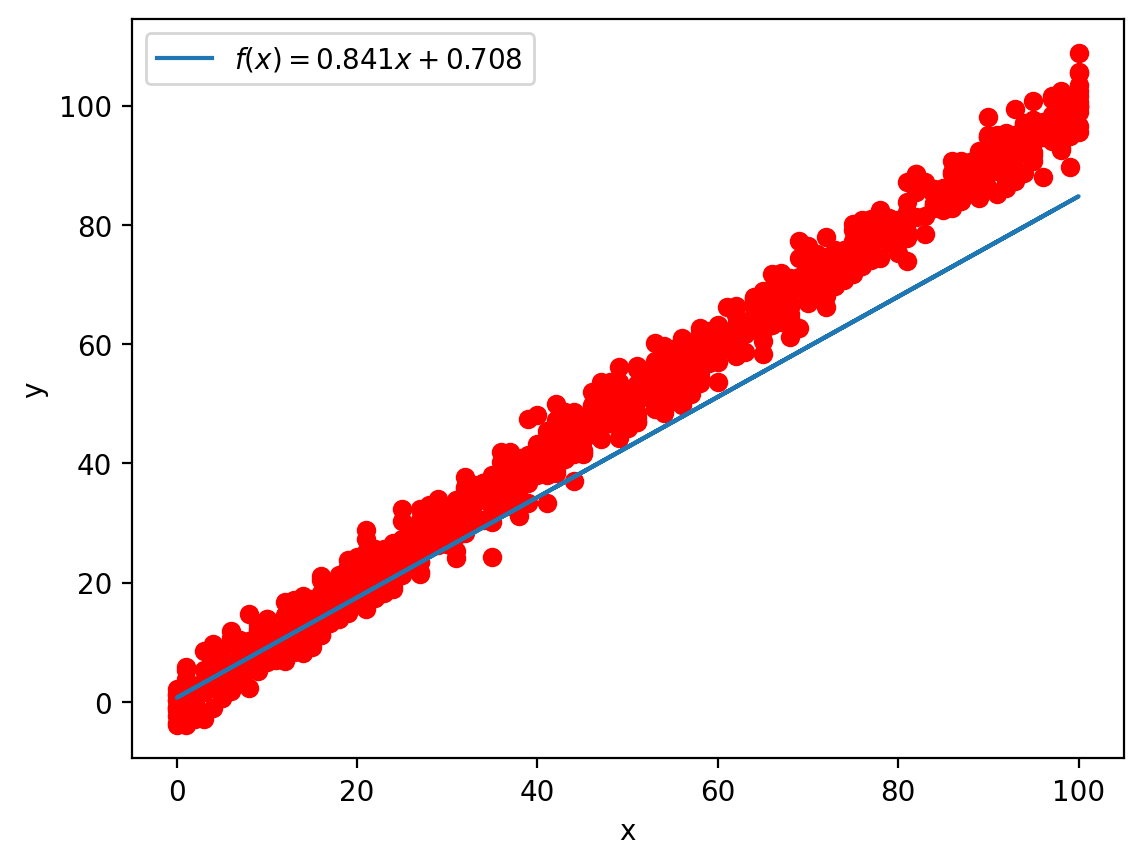

In [8]:
model.eval()

x_vals = dataset.values[500:].squeeze(dim=1)

with torch.inference_mode():
    y_preds = [model(val.unsqueeze(dim=0)) for val in x_vals]

print(str(model))

plt.figure(dpi=200)
plt.scatter(dataset.values, dataset.targets, color="red")
plt.plot(x_vals, y_preds, label=str(model))
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()